In [13]:
#khai oáo thư viện sử dụng
from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
#xây dựng mô hình mạng nơ-ron tích chập
"""models = models.Sequential()
models.add(layers.Conv1D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
models.add(layers.MaxPooling1D((2, 2))) 
models.add(layers.MaxPooling1D((2, 2)))
models.add(layers.Conv1D(64, (3, 3), activation='relu'))
models.add(layers.Conv1D(64, (3, 3), activation='relu'))
models.add(layers.Flatten())
models.add(layers.Dense(63, activation='relu'))
models.add(layers.Dense(9, activation='softmax'))
models.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])"""
                
                
                
                
""""
Thêm BatchNormalization
Thêm Dropout
Tăng số lượng bộ lọc (filters) và tăng số neuron ở lớp Dense
để hoàn thành câu b
"""
# Xây dựng mô hình mới với BatchNormalization và Dropout
model = models.Sequential()

# Block 1: 2 Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 2: 2 Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 3: Fully Connected
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile model sử dụng Adam thay vì RMSprop
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#chuẩn bị dữ liệu
"""(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)"""

# Chuẩn bị dữ liệu
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Huấn luyện mô hình với 20 epoch
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.8499 - loss: 0.5135 - val_accuracy: 0.9818 - val_loss: 0.0627
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9763 - loss: 0.0797 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9828 - loss: 0.0579 - val_accuracy: 0.9901 - val_loss: 0.0312
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9910 - val_loss: 0.0320
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9887 - loss: 0.0393 - val_accuracy: 0.9898 - val_loss: 0.0350
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9880 - loss: 0.0362 - val_accuracy: 0.9909 - val_loss: 0.0303
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9914 - val_loss: 0.0287
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.9905 - loss: 0.0305 - 

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 2.3797e-08 - val_accuracy: 1.0000 - val_loss: 1.7019e-07
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 2.0772e-08 - val_accuracy: 1.0000 - val_loss: 1.7272e-07
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 2.2379e-08 - val_accuracy: 1.0000 - val_loss: 1.7032e-07
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 2.6479e-08 - val_accuracy: 1.0000 - val_loss: 1.6989e-07
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 2.6869e-08 - val_accuracy: 1.0000 - val_loss: 1.7015e-07
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 1.0000 - loss: 2.3410e-08 - val_accuracy: 1.0000 - val_loss: 1.7152e-07
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 1.0000 - loss: 2.3607e-08 - val_accuracy: 1.0000 - val_loss: 1.6962e-07
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/s

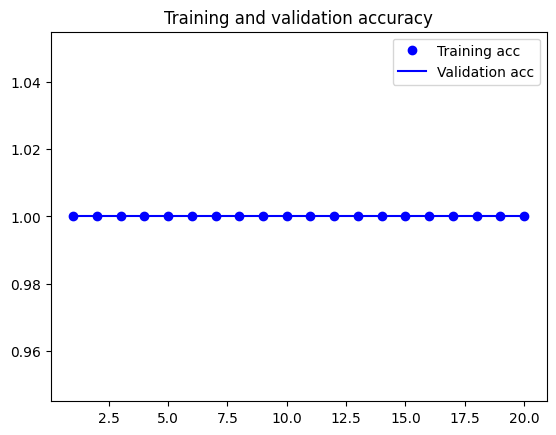

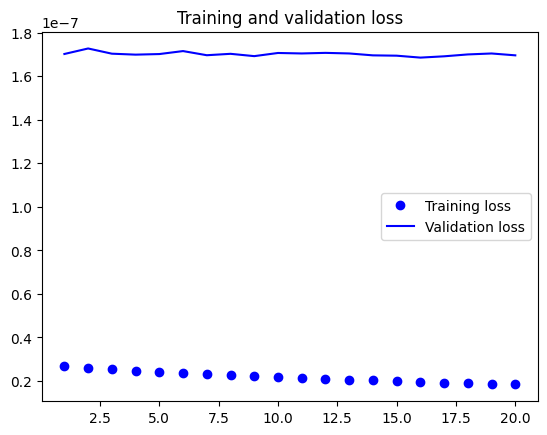

In [11]:
#train và test mô hình
# Câu a vẽ ra các giá trị accuracy và loss của quá trình train và validation khi cho epoch = 20
history = models.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Bài tập thực hành. 

a)  Bổ sung thêm các lệnh để vẽ ra các giá trị accuracy và loss của quá trình train và validation khi cho epoch = 20. Trình bày kết quả thu được vào báo cáo. 

b)  Thay đổi cấu trúc mô hình và các tham số để thu được kết quả tốt hơn chương trình mẫu. Trình bày chương trình và kết quả vào báo cáo.

Thay đổi cấu trúc mô hình
- Thêm BatchNormalization:
Sau mỗi lớp Conv2D (và trước/lớp activation) giúp ổn định quá trình huấn luyện và giảm overfitting.

-Thêm Dropout:
Sau các lớp pooling hoặc sau lớp Dense để ngăn chặn overfitting, đặc biệt khi mô hình trở nên phức tạp hơn.

-Tăng số lượng bộ lọc (filters) và tăng số neuron ở lớp Dense:
Ví dụ, chuyển từ 32 → 64 ở một số lớp, và tăng số neuron ở lớp Dense để học được nhiều đặc trưng hơn.

